In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import otter
grader = otter.Notebook()

%matplotlib inline

# Hide warnings
import warnings
warnings.filterwarnings('ignore')

In [61]:
# load dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [62]:
# input information
print('Train input shape:',x_train.shape)
print('Test input shape:',x_test.shape)
print('Input data type:',x_train.dtype)

Train input shape: (60000, 28, 28)
Test input shape: (10000, 28, 28)
Input data type: uint8


In [63]:
# Normalize the data by dividing by 255, flatten inputs, and convert datatype to float32
x_train = x_train.reshape(60000, 784).astype('float32') / 255
x_test = x_test.reshape(10000, 784).astype('float32') / 255

grader.check('q1')

All tests passed!

In [30]:
from tensorflow.keras import datasets, layers, models

In [32]:
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense
# from tensorflow.keras.layers import Conv2D
# from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten

In [34]:
Sequential = models.Sequential
Dense = layers.Dense
Conv2D = layers.Conv2D
Dropout = layers.Dropout
Activation = layers.Activation
Flatten = layers.Flatten
MaxPooling2D = MaxPooling2D

In [23]:
# Now made a fully connected network with layers of size 300, 200, 100.
# Make a final output layer of size 10 (for each of the 10 digit classes), with a softmax activation

# Initialize model constructor
model = Sequential()
# Add layers sequentially
model.add(Dense(300, activation=tf.nn.relu, \
                    input_shape=(784,)))

# Second..
model.add(Dense(200, activation=tf.nn.relu))

# Third..
model.add(Dense(100, activation=tf.nn.relu))

model.add(Dense(10, activation='softmax'))


grader.check('q2')

All tests passed!

In [24]:
# compile the model with sparse_categorical_crossentropy
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=tf.keras.optimizers.RMSprop(),
              metrics=['accuracy'])

In [25]:
# train the model
NO_EPOCHS = 5
history = model.fit(x_train, y_train,
                    batch_size=64,
                    epochs=NO_EPOCHS,
                    validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 5s 101us/sample - loss: 0.2442 - accuracy: 0.9242 - val_loss: 0.1266 - val_accuracy: 0.9622
Epoch 2/5
48000/48000 [==============================] - 4s 81us/sample - loss: 0.0981 - accuracy: 0.9704 - val_loss: 0.1003 - val_accuracy: 0.9703
Epoch 3/5
48000/48000 [==============================] - 4s 75us/sample - loss: 0.0686 - accuracy: 0.9793 - val_loss: 0.1006 - val_accuracy: 0.9737
Epoch 4/5
48000/48000 [==============================] - 5s 95us/sample - loss: 0.0531 - accuracy: 0.9839 - val_loss: 0.0909 - val_accuracy: 0.9761
Epoch 5/5
48000/48000 [==============================] - 5s 102us/sample - loss: 0.0423 - accuracy: 0.9880 - val_loss: 0.1105 - val_accuracy: 0.9777


In [26]:
# Evaluate the model
test_scores = model.evaluate(x_test, y_test, verbose=0)
loss = test_scores[0]
accuracy = test_scores[1]
#print('Test loss:', test_scores[0])
print('Test accuracy:', accuracy)

grader.check('q3')

Test accuracy: 0.9768


All tests passed!

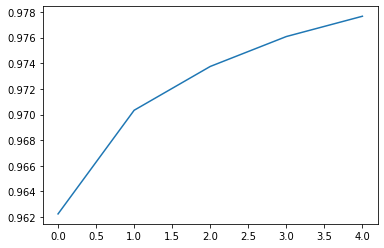

In [27]:
# plot accuracy over the epochs. Hint: look at history.history
plt.plot(range(NO_EPOCHS),history.history['val_accuracy'])

In [83]:
# Now train a CNN with 2 Conv2d layers, one pooling layer, a flattening layer, and a dense layer for the output.
# Hint: you will have to reshape your training data
# Also for the Conv2d layers, you should use data_format='channel_last'

model = Sequential()

model.add(Conv2D(filters=32, kernel_size = (3, 3), activation=tf.nn.relu, input_shape=(28,28,1), data_format='channels_last'))

model.add(Conv2D(filters=64, kernel_size = (3, 3), activation=tf.nn.relu, input_shape=(28,28,1), data_format='channels_last'))

model.add(MaxPooling2D((2, 2)))

model.add(Flatten())

model.add(Dense(10, activation='softmax', input_shape=(784,)))

grader.check('q4')

All tests passed!

In [84]:
# compile the model
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=tf.keras.optimizers.RMSprop(),
              metrics=['accuracy'])

In [85]:
# load dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train.reshape(60000, 784).astype('float32') / 255
x_test = x_test.reshape(10000, 784).astype('float32') / 255

x_train = x_train.reshape(60000, 28, 28, 1) 
x_test = x_test.reshape(10000, 28, 28, 1)

In [86]:
# train the model
NO_EPOCHS = 5
history = model.fit(x_train, y_train,
                    batch_size=64,
                    epochs=NO_EPOCHS,
                    validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 70s 1ms/sample - loss: 0.1663 - accuracy: 0.9499 - val_loss: 0.0749 - val_accuracy: 0.9781
Epoch 2/5
48000/48000 [==============================] - 73s 2ms/sample - loss: 0.0586 - accuracy: 0.9823 - val_loss: 0.0542 - val_accuracy: 0.9852
Epoch 3/5
48000/48000 [==============================] - 76s 2ms/sample - loss: 0.0422 - accuracy: 0.9876 - val_loss: 0.0554 - val_accuracy: 0.9842
Epoch 4/5
48000/48000 [==============================] - 62s 1ms/sample - loss: 0.0345 - accuracy: 0.9897 - val_loss: 0.0475 - val_accuracy: 0.9865
Epoch 5/5
48000/48000 [==============================] - 65s 1ms/sample - loss: 0.0291 - accuracy: 0.9914 - val_loss: 0.0518 - val_accuracy: 0.9857


In [87]:
# Evaluate the model
test_scores = model.evaluate(x_test, y_test, verbose=0)
loss = test_scores[0]
accuracy = test_scores[1]
#print('Test loss:', test_scores[0])
print('Test accuracy:', accuracy)

grader.check('q5')

Test accuracy: 0.9871


All tests passed!